In [2]:
!pip3 install librosa

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/output.wav')

MessageError: ignored

In [4]:
filename='/content/output.wav'

In [5]:
import IPython.display as ipd

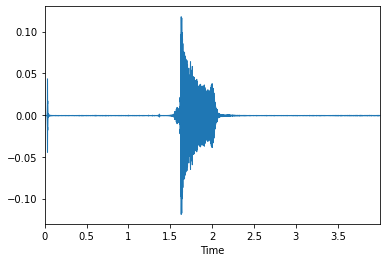

In [6]:
data,samplerate=librosa.load(filename)
librosa.display.waveplot(data,sr=samplerate)
ipd.Audio(filename)


In [ ]:
data
df=pd.DataFrame(data)
df


,0
0,0.000000e+00
1,-6.933437e-23
2,5.651139e-22
3,1.127708e-23
4,4.632996e-23
...,...
88195,8.849848e-05
88196,3.904866e-05
88197,-3.803439e-07
88198,-2.588754e-05


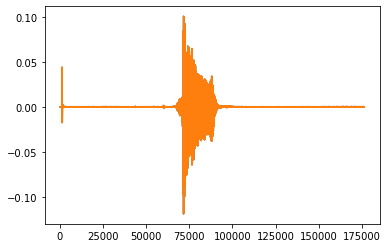

In [ ]:
from scipy.io import wavfile as wav
wav_sr,wav_audio=wav.read(filename)
plt.plot(wav_audio)

In [ ]:
mfccs=librosa.feature.mfcc(y=data,sr=samplerate)
print(mfccs.shape)

(20, 862)


In [ ]:
mfccs

array([[-3.10461609e+02, -2.12971100e+02, -2.04804825e+02, ...,
        -2.72712372e+02, -2.46605728e+02, -2.26814117e+02],
       [ 1.09968567e+02,  9.61263199e+01,  8.13895035e+01, ...,
         1.04711357e+02,  1.12136353e+02,  1.25315475e+02],
       [ 2.95383415e+01,  3.24207382e+01,  3.38182373e+01, ...,
         1.10245171e+01,  1.09081678e+01, -9.98436165e+00],
       ...,
       [-1.63197982e+00, -3.80105197e-01, -2.00214759e-01, ...,
         1.72112617e+01,  1.22558594e+01,  1.37567787e+01],
       [-9.44319248e+00, -7.68905640e+00, -5.59391785e+00, ...,
        -1.27936468e+01, -1.13275280e+01, -1.92534208e-01],
       [ 4.38413429e+00,  1.14515495e+00, -1.68298638e+00, ...,
        -7.66427135e+00,  8.19142818e-01,  8.46391773e+00]], dtype=float32)

In [ ]:
n_ffts=2048
hop_length=512
sftc=librosa.core.stft(data,hop_length=hop_length,n_fft=n_ffts)
sftc=np.abs(sftc)
sftc

array([[1.65228848e-03, 8.12030514e-04, 6.26386918e-06, ...,
        1.26833756e-05, 2.23873835e-03, 8.33406579e-03],
       [1.70413684e-03, 8.31470999e-04, 2.11247389e-05, ...,
        2.89654618e-05, 2.25995900e-03, 8.44669249e-03],
       [1.63732353e-03, 9.51349852e-04, 9.36451543e-05, ...,
        1.80240706e-04, 2.26809713e-03, 8.86083208e-03],
       ...,
       [1.17390824e-04, 5.87028444e-05, 2.23282754e-07, ...,
        7.76897139e-07, 3.58877423e-06, 1.61186363e-05],
       [1.17911070e-04, 5.91467033e-05, 5.07666698e-07, ...,
        6.96318637e-07, 4.55631971e-06, 1.73705230e-05],
       [1.17992910e-04, 5.88425282e-05, 4.29949495e-07, ...,
        1.23257666e-06, 6.27091049e-06, 1.86305151e-05]], dtype=float32)

Text(0.5, 1.0, 'Power spectrum')

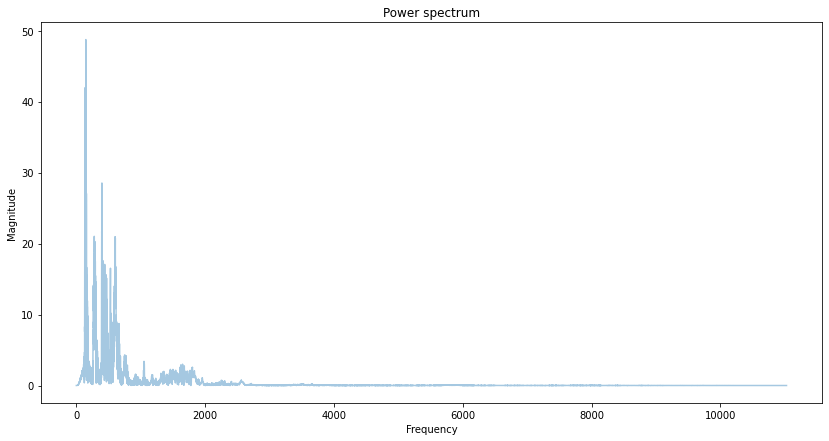

In [7]:
fft = np.fft.fft(data)
spectrum = np.abs(fft)
f = np.linspace(0, samplerate, len(spectrum))
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
plt.figure(figsize=(14,7))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Power spectrum')

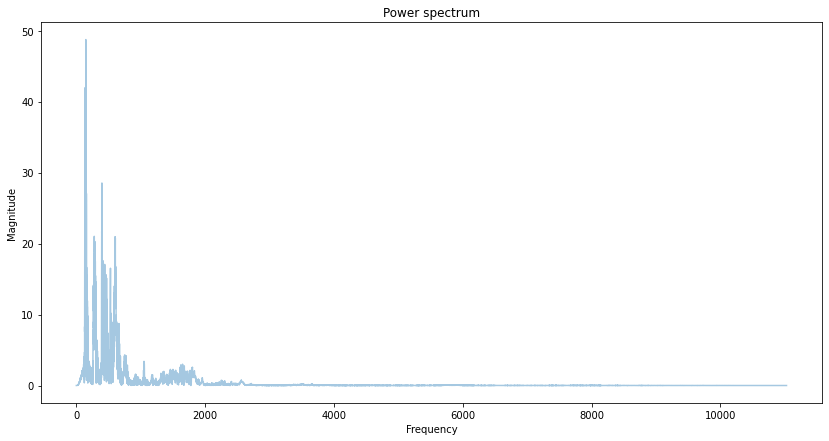

In [ ]:
data,samplerate=librosa.load(filename)
fft = np.fft.fft(data)
spectrum = np.abs(fft)
f = np.linspace(0, samplerate, len(spectrum))
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
plt.figure(figsize=(14,7))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
left_f

array([0.00000000e+00, 1.00000454e-01, 2.00000907e-01, ...,
       1.10247500e+04, 1.10248500e+04, 1.10249500e+04])

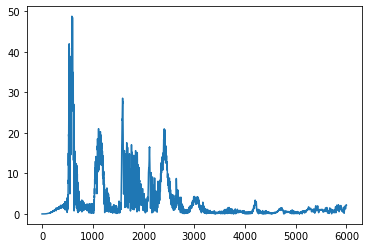

In [10]:
y=np.fft.fft(data)
plt.plot(np.abs(y[0:6000]))

In [ ]:
len(y)

88200

Text(0.5, 0, 'Frequency(Hz)')

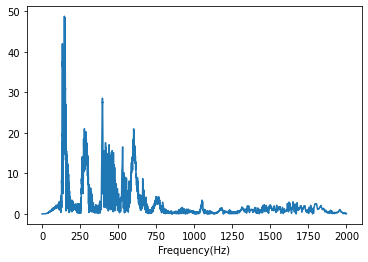

In [11]:
fr=np.array(range(0,88200))/4
condition=(fr>0)&(fr<2000)
plt.plot(fr[condition],np.abs(y[condition]))
plt.xlabel('Frequency(Hz)')

In [12]:
array=np.array(np.abs(y[condition]))

mean=np.mean(array)
frequency=[i for i,val in enumerate(array) if val>mean]
magnitude=array[frequency]
magnitude

array([2.72564575, 2.99317086, 3.03882592, ..., 2.75956965, 2.76185047,
       2.7066174 ])

Text(0.5, 0, 'Frequency(Hz)')

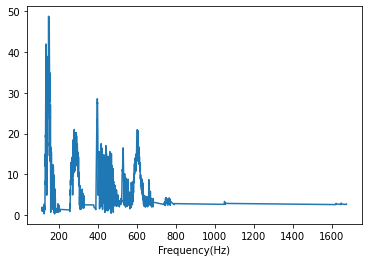

In [13]:
plt.plot(fr[frequency],np.abs(y[frequency]))
plt.xlabel('Frequency(Hz)')

In [14]:
x=magnitude
peaks, properties = find_peaks(x, prominence=1, width=20)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

NameError: ignored

In [ ]:

plt.plot(fr[np.abs(peaks*0.5)],np.abs(y[np.abs(peaks*0.5)]))

IndexError: ignored

In [8]:
x=np.array(np.abs(y[condition]))
peaks, properties = find_peaks(x, prominence=1, width=20)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

NameError: ignored

In [18]:
import pandas as pd
filename='/content/output.wav'
csv_file = filename.replace('.wav', '.csv')
csv_file

'/content/output.csv'